# Image Study Example 10_1


## 1. Convolution

In [4]:
import numpy as np

A = np.array([[5,8,3,4,6,2,3,7],[3,2,1,1,9,5,1,0],[0,9,5,3,0,4,8,3],[4,2,7,2,1,9,0,6],
             [9,7,9,8,0,4,2,4],[5,2,1,8,4,1,0,9],[1,8,5,4,9,2,3,8],[3,7,1,2,3,4,4,6]])
print(A)

[[5 8 3 4 6 2 3 7]
 [3 2 1 1 9 5 1 0]
 [0 9 5 3 0 4 8 3]
 [4 2 7 2 1 9 0 6]
 [9 7 9 8 0 4 2 4]
 [5 2 1 8 4 1 0 9]
 [1 8 5 4 9 2 3 8]
 [3 7 1 2 3 4 4 6]]


In [5]:
B = np.array([[2,1,0],[1,1,-1],[0,-1,-2]])
print(B)

[[ 2  1  0]
 [ 1  1 -1]
 [ 0 -1 -2]]


### 2D Convolution은 scipy Library의 Signal을 사용하거나 (아래에 나올) Ndimage를 사용하면 된다
### mode='same'을 사용하면 Output Matrix Size가 Input과 동일하게 된다

In [7]:
import scipy.signal as sig

C = sig.convolve2d(A,B,mode='same')
print(C)

[[ 20  10   2  26  23   6   9   4]
 [ 18   1  -8   2   7   3   3 -11]
 [ 14  22   5  -1   9  -2   8  -1]
 [ 29  21   9  -9  10  12  -9  -9]
 [ 21   1  16  -1  -3  -4   2   5]
 [ 15  -9  -3   7  -6   1  17   9]
 [ 21   9   1   6  -2  -1  23   2]
 [  9  -5 -25 -10 -12 -15  -1 -12]]


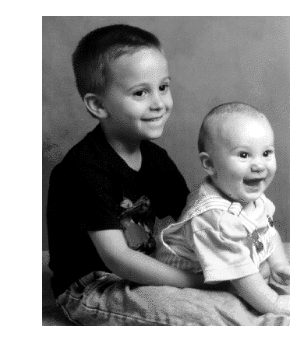

(400, 318)


In [16]:
from PIL import Image
import pylab as plt

img = np.array(Image.open('D:\\ppy\\kids.tif').convert('L'))

plt.figure(1)
plt.imshow(img)
plt.axis('off')
plt.gray()
plt.show()
print(img_avg.shape)

### Uniform, Average Filter (Low Pass Filter)
### Scipy의 Ndimage Library를 사용하여 구하는 과정

In [17]:
A = np.ones((3,3))/9.0
print(A)

[[ 0.11111111  0.11111111  0.11111111]
 [ 0.11111111  0.11111111  0.11111111]
 [ 0.11111111  0.11111111  0.11111111]]


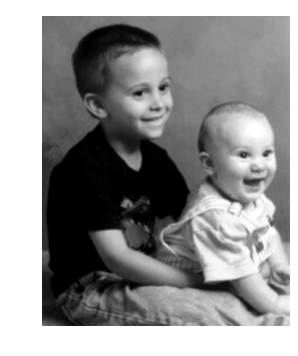

(400, 318)


In [19]:
import scipy.ndimage as sci

img_avg = sci.convolve(img, A)
plt.figure(2)
plt.imshow(img_avg)
plt.axis('off')
plt.gray()
plt.show()
print(img_avg.shape)

### High-Pass Filter
### Overflow방지를 위해 Float으로 변환해 주고 Clip한다

[[ 0. -1.  0.]
 [-1.  5. -1.]
 [ 0. -1.  0.]]


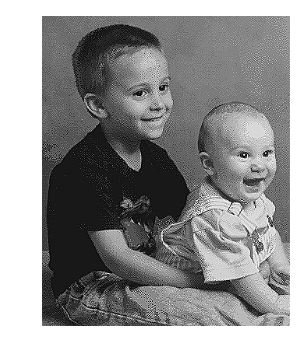

In [37]:
B = np.array([[0.,-1.,0.],[-1.,5.,-1.],[0.,-1.,0.]])
print(B)

img = np.array(Image.open('D:\\ppy\\kids.tif').convert('L'))
img = img.astype(dtype='float')

img_high = sci.convolve(img, B)
img_high = np.clip(img_high,0,255)
plt.figure(3)
plt.imshow(img_high)
plt.axis('off')
plt.gray()
plt.show()

### Horizontal Difference를 구하는 Filter
### 마찬가지로 Overflow 방지

[[ 1.  1.  1.]
 [ 0.  0.  0.]
 [-1. -1. -1.]]


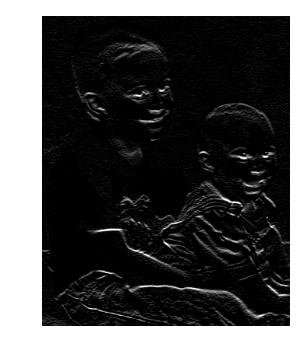

In [41]:
C = np.array([[1.,1.,1.],[0.,0.,0.],[-1.,-1.,-1.]])
print(C)

img = np.array(Image.open('D:\\ppy\\kids.tif').convert('L'))
img = img.astype(dtype='float')

img_horEdgeD = sci.convolve(img, C)
img_horEdgeD = np.clip(img_horEdgeD,0,255)
plt.figure(4)
plt.imshow(img_horEdgeD)
plt.axis('off')
plt.gray()
plt.show()

scipy.ndimage에서 제공하는 Filter들  
자세한 내용은 [링크](https://docs.scipy.org/doc/scipy-0.18.1/reference/ndimage.html) 참조

- Gaussian
- Laplace
- Prewitt
- Sobel
- Uniform (average)
- Median / Min / Max Filter

### 이 외의 필터는 구글 검색으로 찾던지 (ex. python median filter) 직접 구현해 본다